# K-nearest neighbor (K-NN)
Steps:
1. Plot **10 simple graphs**
2. Try to use the KNN implementation of the **sklearn** library "sklearn.neighbors". Use <code>metric='precomputed</code>
3. My implementation of K-NN to use the graph datatype and GED as distance metric

## Plot **10 simple graphs**
I will create 10 graphs with 10 points to test my algorithm on them and learn based on them


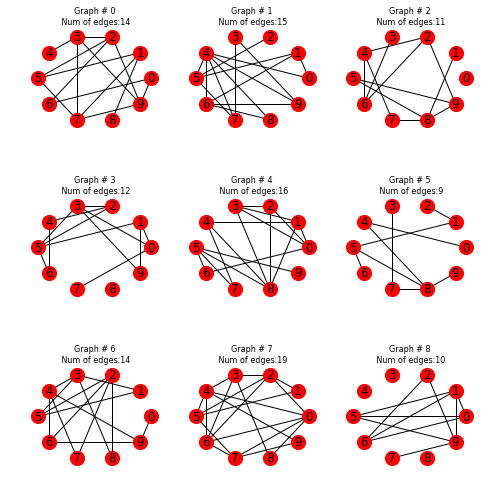

In [485]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

def create_nine_rand_graph():
    rand_graphs = list()
    for i in range(9):
            G = nx.fast_gnp_random_graph(n=10, p=0.30, seed=i)
        G.name = 'Graph # '+str(i)
        rand_graphs.append(G)
        
    return rand_graphs

def graph_series_general_info(graph_series):
    for i in range(len(graph_series)):
        print(nx.info(graph_series[i]))       
        print("\nNumber of connected components = ", nx.number_connected_components(graph_series[i]))

def plot_graph_series(graph_series):
    fig = plt.figure(1); plt.clf()
    fig, ax_9 = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    for i in range(len(graph_series)):
        # compute index for the subplot, and set this subplot as current
        ix = np.unravel_index(i, ax_9.shape)
#         plt.sca(ax_9[ix])
        pos = nx.circular_layout(graph_series[i])
        nx.draw(graph_series[i], 
                pos, 
                with_labels=True, 
                node_color='r',
                node_size=200, 
                alpha=1, 
                ax=ax_9[ix])
        ax_9[ix].set_title(graph_series[i].name + 
                           "\n Num of edges:" + 
                           str(graph_series[i].number_of_edges()),
                           fontsize=8)
        ax_9[ix].set_axis_off()
    plt.subplots_adjust(hspace=0.75)
    plt.show()
        
        
rand_graphs = create_nine_rand_graph()
plot_graph_series(rand_graphs)
# graph_series_general_info(rand_graphs)


## Adjust official scikit-learn to work with graph datatype
Try to use the KNN implementation of the sklearn library <code>sklearn.neighbors</code> and use <code>metric='precomputed'</code> option.

First, I have to compute the distance between each two graphs using the **Graph edit distance** metric. let's test this functionality on two simple graphs.
**Notice:** I use the default parameters which are the following:
- node_subst_cost: default node substitution cost of 0 is used (node attributes are not considered during matching).
- node_ins_cost: default node insertion cost of 1 is used
- node_del_cost: default node deletion cost of 1 is used
- edge_subst_cost: default edge substitution cost of 0 is used (edge attributes are not considered during matching).
- edge_del_cost: default edge deletion cost of 1 is used.
- edge_ins_cost: default edge insertion cost of 1 is used.

graph_edit_distance(cycle_graph(6), wheel_graph(7)) =  7.0


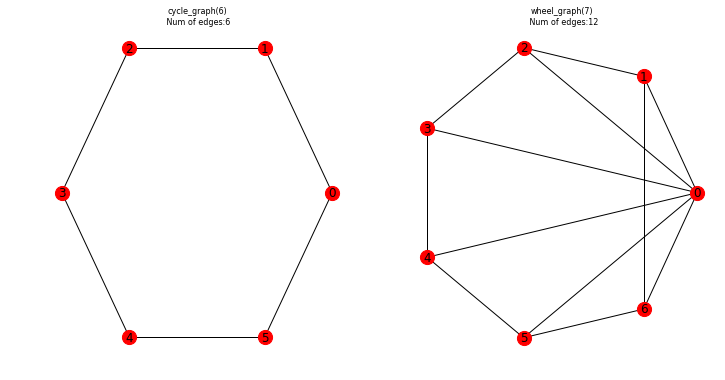

In [234]:
G1 = nx.cycle_graph(6)
G1.name = 'cycle_graph(6)'
G2 = nx.wheel_graph(7)
G2.name = 'wheel_graph(7)'
print('graph_edit_distance(cycle_graph(6), wheel_graph(7)) = ', str(nx.graph_edit_distance(G1, G2)))
pos1 = nx.circular_layout(G1)
pos2 = nx.circular_layout(G2)
pos = [pos1, pos2]
G = [G1, G2]

fig = plt.figure(1); plt.clf()
fig, ax_2 = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for i in range(len(G)):
    ix = np.unravel_index(i, ax_2.shape)
    nx.draw(G[i], 
            pos[i], 
            with_labels=True, 
            node_color='r',
            node_size=200, 
            alpha=1,
            ax=ax_2[ix])
    ax_2[ix].set_title(G[i].name + 
                       "\n Num of edges:" + 
                       str(G[i].number_of_edges()),
                       fontsize=8)
    ax_2[ix].set_axis_off()
plt.show()


However, the function <code>nx.graph_edit_distance(G1, G2)</code> is super slow for our purpose. You can see how slow is this function on <code>nx.graph_edit_distance is slow.ipynb</code> notebook. let's see a different implementation of GED in action (**Gmatch4py**)

In **Gmatch4py**, the author implemented an algorithm that transpose the graph edit distance to an Assignment Problem. The author also implement some other graph distance algorithms which I list them here.
- Approximated Graph Edit Distance
- Hausdorff Graph Edit Distance
- Bipartite Graph Edit Distance
- Greedy Edit Distance

Let's see the performance of these implementation for our simple 9 graphs (Each graph have only 10 vertices) and produce the distance matrix.

In [309]:
from myHelper import timing

# Gmatch4py use networkx graph 
import networkx as nx 
# import the GED using the munkres algorithm
import gmatch4py as gm

@timing.time_it
def GED_distance_matrix(graph_series):
    ged=gm.GraphEditDistance(1,1,1,1) # all edit costs are equal to 1
    result=ged.compare(graph_series,None)
    similarity = ged.similarity(result)
    distance = ged.distance(result)
    return result, similarity, distance

@timing.time_it
def greedy_GED_distance_matrix(graph_series):
    ged=gm.GreedyEditDistance(1,1,1,1) # all edit costs are equal to 1
    result=ged.compare(graph_series,None)
    similarity = ged.similarity(result)
    distance = ged.distance(result)
    return result, similarity, distance

@timing.time_it
def HED_distance_matrix(graph_series):
    ged=gm.HED(1,1,1,1) # all edit costs are equal to 1
    result=ged.compare(graph_series,None)
    similarity = ged.similarity(result)
    distance = ged.distance(result)
    return result, similarity, distance


rand_graphs = create_nine_rand_graph()
GED, GED_similarity, GED_distance = GED_distance_matrix(rand_graphs)
greedy_GED, greedy_GED_similarity, greedy_GED_distance  = greedy_GED_distance_matrix(rand_graphs)
HED, HED_similarity, HED_distance = HED_distance_matrix(rand_graphs)
print("\n GED = ", GED )
print("\n greedy_GED = ",greedy_GED)
print("\n HED = ", HED )

print("\n GED_similarity = ", GED_similarity )
print("\n greedy_GED_similarity = ",greedy_GED_similarity)
print("\n HED_similarity = ", HED_similarity )

print("\n GED_distance = ", GED_distance )
print("\n greedy_GED_distance = ",greedy_GED_distance)
print("\n HED_distance = ", HED_distance )


GED_distance_matrix took 83.81795883178711mil sec
greedy_GED_distance_matrix took 23.410797119140625mil sec
HED_distance_matrix took 13584.528923034668mil sec

 GED =  [[ 0. 16. 20. 15. 20. 19. 15. 17. 14.]
 [16.  0. 18. 16. 19. 17. 16. 18. 19.]
 [20. 21.  0. 19. 16. 14. 16. 24. 17.]
 [16. 16. 20.  0. 17. 19. 18. 17. 13.]
 [16. 19. 14. 14.  0. 15. 16. 19. 18.]
 [19. 19. 14. 20. 17.  0. 20. 20. 20.]
 [15. 17. 13. 18. 16. 12.  0. 15. 16.]
 [16. 16. 20. 14. 16. 18. 14.  0. 20.]
 [16. 23. 19. 15. 24. 19. 21. 25.  0.]]

 greedy_GED =  [[0.00000000e+00 1.84467441e+19 9.22337204e+18 9.22337204e+18
  9.22337204e+18 9.22337204e+18 9.22337204e+18 9.22337204e+18
  1.90000000e+01]
 [2.50000000e+01 0.00000000e+00 9.22337204e+18 2.10000000e+01
  9.22337204e+18 9.22337204e+18 1.60000000e+01 1.90000000e+01
  2.90000000e+01]
 [9.22337204e+18 9.22337204e+18 0.00000000e+00 9.22337204e+18
  9.22337204e+18 1.70000000e+01 1.70000000e+01 1.84467441e+19
  9.22337204e+18]
 [9.22337204e+18 9.22337204e+18 3.0000

Let's see the distance of the first graph from the other 8 graphs using the exact **$A^*$ algorithm** which is implemented in **Networkx** library.

In [310]:
@timing.time_it
def nxGED(graph_series):
    distances = list()
    for i in range(len(graph_series)):
        single_dist = nx.graph_edit_distance(graph_series[0], graph_series[i])
        print(single_dist)
        distances.append(single_dist)
    return distances

rand_graphs = create_nine_rand_graph()
nxGED(rand_graphs)


0.0
5.0
5.0
4.0
6.0
5.0
6.0
7.0
6.0
nxGED took 1499235.869884491mil sec


[0.0, 5.0, 5.0, 4.0, 6.0, 5.0, 6.0, 7.0, 6.0]

It takes many second for this 9 graphs and not useful for my KNN algoirthm.

Second, I am using the **K-NearestNeighbors** implementation of the **scikit-learn** libarary to do the anomaly detection on a series of graphs. To do this, I try to use the **KNN classifier** function <code>KNeighborsClassifier</code> before any outlier detection.

In [487]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

rand_graphs = create_nine_rand_graph()
ged=gm.GraphEditDistance(1,1,1,1) # all edit costs are equal to 1
result=ged.compare(rand_graphs,None)
symetric_result = (result.transpose()+result)/2
print("precomputed distance matrix =\n",symetric_result)


neigh = KNeighborsClassifier(n_neighbors=3,
                             radius=0.4,
                             algorithm="brute",
                             metric="precomputed")

graph_labels = np.array([0,0,0,0,0,1,0,0,0])
neigh.fit(X=symetric_result,y=graph_labels)
neigh.kneighbors(X=None, n_neighbors=None, return_distance=True)

# Consider 1 out of 9 graphs as test graph to predict the label for it
# test_graph = np.array([1,1,1,1,1,1,1,1,1]).reshape(1,9)
# test_graph =symetric_result[0].reshape(1,9)
test_graph =symetric_result
print("Predicted classes = \n", neigh.predict(X=test_graph))
print("Probability of prediction = \n", neigh.predict_proba(X=test_graph))
print("Mean accuracy for the train data = \n", neigh.score(X=test_graph, y=graph_labels, sample_weight=None))



precomputed distance matrix =
 [[ 0.  16.  20.  15.5 18.  19.  15.  16.5 15. ]
 [16.   0.  19.5 16.  19.  18.  16.5 17.  21. ]
 [20.  19.5  0.  19.5 15.  14.  14.5 22.  18. ]
 [15.5 16.  19.5  0.  15.5 19.5 18.  15.5 14. ]
 [18.  19.  15.  15.5  0.  16.  16.  17.5 21. ]
 [19.  18.  14.  19.5 16.   0.  16.  19.  19.5]
 [15.  16.5 14.5 18.  16.  16.   0.  14.5 18.5]
 [16.5 17.  22.  15.5 17.5 19.  14.5  0.  22.5]
 [15.  21.  18.  14.  21.  19.5 18.5 22.5  0. ]]
Predicted classes = 
 [0 0 0 0 0 0 0 0 0]
Probability of prediction = 
 [[1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]
Mean accuracy for the train data = 
 0.8888888888888888


I considered some labels for my 9 graphs and predict the label of graphs based on the precomputed distance matrix using the GraphEditDistance (Munkres algorithm used instead of compute the exact graph edit distance between every two graphs)

## Unsupervised Outlier Detection using Local Outlier Factor (LOF) on graphs
After being able to use **KNN classifer** on our graph series, I want to see investigate the ability of being able to detect any anomalies in our graph series considering the pairwise graph distances to each other. This anomaly detection algorithm, give an anomaly score to each graph which is called Local Outlier Factor (LOF) by considering its local deviation of density with respect to its neighboring graphs. 

In other words, the **local density** is computed using K-nearest neighbors and their distance to our graph. If the local density of a graph and the local density of its neighbors have significant difference, we consider this graph as outlier in our graph series.

I am using **scikit-learn** library and <code>sklearn.neighbors.LocalOutlierFactor</code> implementation for this algorithm.

In [567]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

rand_graphs = create_nine_rand_graph()

# # insert an outlier
# rand_graphs[8] = G = nx.fast_gnp_random_graph(n=8, p=0.88, seed=0)

ged=gm.GraphEditDistance(1,1,1,1) # all edit costs are equal to 1
result=ged.compare(rand_graphs,None)
symetric_result = (result.transpose()+result)/2
# print("precomputed distance matrix =\n",symetric_result)

clf = LocalOutlierFactor(n_neighbors=2,
                         algorithm="brute",
                         metric="precomputed",
#                          contamination=0.01, # the proportion of outliers in the data set float 
                         contamination='auto', # the proportion of outliers in the data set float 
                         novelty=False, # novelty=True if you want to use LOF for novelty 
                                        # detection and predict on new unseen data
                         n_jobs=None)

clf.fit(X=symetric_result)


# predict on training data
# Fits the model to the training set X and returns the labels.
outlier_prediction = clf.fit_predict(X=symetric_result)
print("outlier prediction (-1 = abnormal, 1 = normal) \n\n",
      outlier_prediction)

# Fit the model using X as training data.
clf.fit(X=symetric_result)

# Observations having a negative_outlier_factor smaller than offset_ are detected as abnormal.
# The offset is set to -1.5 (inliers score around -1), except when
# a contamination parameter different than “auto” is provided.
print("\n Outlier threshold = ", clf.offset_)


# Only available for novelty detection (when novelty is set to True).
# The shift offset allows a zero threshold for being an outlier.
# print("decision_function = ", clf.decision_function(X=symetric_result))


#  negative_outlier_factor_ndarray shape (n_samples,)
#  negative_outlier_factor_ = -1 normal
#  negative_outlier_factor_ << -1 abnormal 
print("\n Outlier scores (1 = normal, 1 >> abnormal)= \n \n", -(clf.negative_outlier_factor_))

outlier prediction (-1 = abnormal, 1 = normal) 

 [1 1 1 1 1 1 1 1 1]

 Outlier threshold =  -1.5

 Outlier scores (1 = normal, 1 >> abnormal)= 
 
 [0.99180328 1.0579235  1.00833333 1.00833333 1.         1.
 0.99180328 0.99180328 1.00833333]


## Hyper parameter tuning (K value tuning)
Using GridSearchCV to find the optimal value for 'n_neighbors'. However, this function can be used for <code>KNeighborsClassifier</code> not <code>LocalOutlierFactor</code>. I will just comment how it works for <code>KNeighborsClassifier</code> class. Later, I will tune this parameter for my actual dataset of Heartbeat graphs. 

The following links can be useful for deep understanding on how to tune this parameter. 

https://stats.stackexchange.com/questions/138675/choosing-a-k-value-for-local-outlier-factor-lof-detection-analysis

https://arxiv.org/pdf/1902.00567.pdf

In [ ]:
# from sklearn.model_selection import GridSearchCV

# #create new a knn model
# knn2 = KNeighborsClassifier()

# #create a dictionary of all values we want to test for n_neighbors
# param_grid = {'n_neighbors': np.arange(1, 25)}

# #use gridsearch to test all values for n_neighbors
# knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

# #fit model to data
# knn_gscv.fit(X, y)